In [224]:
import pandas as pd
import re
import sqlite3
import matplotlib.pylab as plt

### Reading In Lottery Sales Stats CSV file

In [199]:
#This is a frame of how much sales of Powerball tickets in States
df = pd.read_csv(r"Lottery_Sales_Stats.csv", encoding='latin-1')
df.head(8)

,Characteristic,Sales in million U.S. dollars
0,New York,"10,355.48"
1,Florida,"9,324.63"
2,California,"8,865.75"
3,Texas,"8,296.89"
4,Massachusetts*,"5,853.59"
5,Ohio,"5,628.99"
6,Georgia,"5,553.12"
7,Pennsylvania,"5,121.29"


### Data Cleaning Lottery Sales Stats

In [200]:
#Switching Web Scrapers name from the stats site
df = df.rename(columns={'Characteristic': 'States'})

In [201]:
#Couldn't convert to float astype because of commas 
df['Sales in million U.S. dollars'] = df['Sales in million U.S. dollars'].str.replace(',', '')

In [202]:
#Converted to float
df['Sales in million U.S. dollars'] = df['Sales in million U.S. dollars'].astype(float)

### Data Analysis Lottery Sales Stats

In [219]:
#Because only 80 cents on every 2 dollar ticket sold is given to states.  This is ACTUALLY how much is sold each
#Year.  IN MILLIONS!!
actual_amount_spent = df['Sales in million U.S. dollars'] / .4
actual_amount_spent.head(8)

0    25888.700
1    23311.575
2    22164.375
3    20742.225
4    14633.975
5    14072.475
6    13882.800
7    12803.225
Name: Sales in million U.S. dollars, dtype: float64

In [220]:
# Amount earned for Multi-State Lottery Association.  IN MILLIONS!
MSLA_Profit = actual_amount_spent * .6
MSLA_Profit.head(8)

0    15533.220
1    13986.945
2    13298.625
3    12445.335
4     8780.385
5     8443.485
6     8329.680
7     7681.935
Name: Sales in million U.S. dollars, dtype: float64

### Reading in Wealth Inequality CSV

In [205]:
df2 = pd.read_csv(r"Wealth_Inequality.csv", encoding='latin-1')
df2.head(10)

,Characteristic,Gini Coeffecient
0,Puerto Rico,0.55
1,New York,0.52
2,District of Columbia,0.51
3,Connecticut,0.50
4,Massachusetts,0.50
5,California,0.50
6,Louisiana,0.49
7,Florida,0.49
8,Alabama,0.49
9,United States,0.49


### Cleaning Wealth Inequality CSV File

In [221]:
#Switching Web Scrapers name from the stats site
df2 = df2.rename(columns={'Characteristic': 'States'})
df2.head(8)

,States,Gini Coeffecient
0,New York,0.52
1,Connecticut,0.50
2,Massachusetts,0.50
3,California,0.50
4,Louisiana,0.49
5,Florida,0.49
6,Illinois,0.48
7,New Jersey,0.48


In [207]:
df2.drop([0,2,8,9,23,39,51,52], axis=0, inplace=True)

In [208]:
#Reindexing
df2 = df2.iloc[0:]

df2 = df2.reset_index(drop=True)

### Wealth Inequality Graph

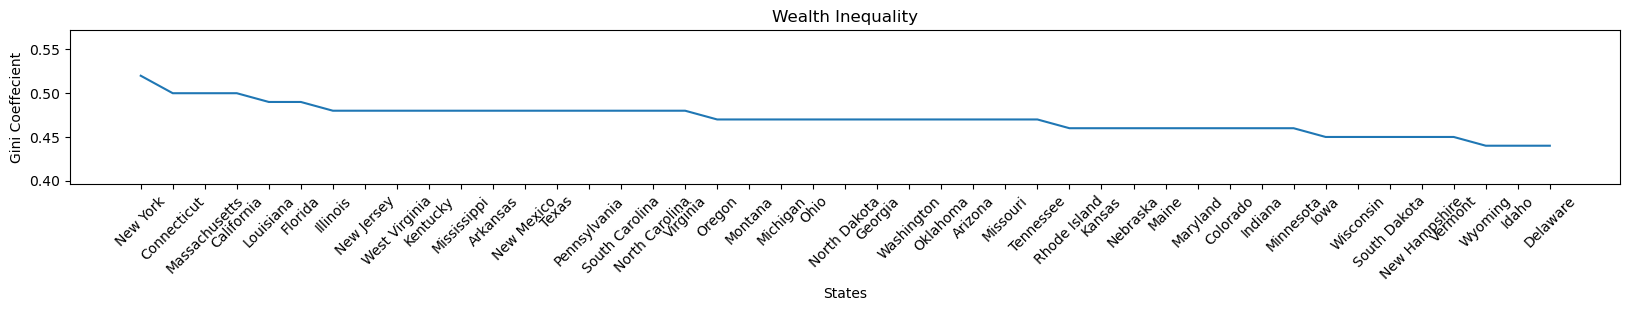

In [248]:
x = df2['States']
y = df2['Gini Coeffecient']

fig = plt.figure(figsize=(20, 2))
ax = fig.add_subplot(111)
ax.plot(x, y)

plt.title("Wealth Inequality")
plt.xlabel("States")
plt.ylabel("Gini Coeffecient")

plt.xticks(rotation=45)
plt.ylim(min(y) * 0.9, max(y) * 1.1)

plt.show()

#### Converting Dataframes cleaned back to CSV to join in SQLite

In [209]:
# df.to_csv('Clean_Lottery_Sales_Stats.csv')
# df2.to_csv('Clean_Wealth_Inequality.csv')

### Processing Joined SQLite table into a Dataframe

In [210]:
conn = sqlite3.connect('Powerball_Wealth_Inequality.db')
cursor = conn.cursor()
cursor.execute('SELECT * FROM Joined_Wealth_Inequality')
conn.commit()
results = cursor.fetchall()
for row in results:
    data = []
    for row in results:
        data.append(row[:47])
    df3 = pd.DataFrame(data)

conn.close()

### Cleaning SQLite Powerball Wealth Inequality File

In [211]:
df3.columns = ['Index_Inequality', 'State_Inequality', 'Gini_Coeffecient', 'Index_Sales', 'State_Sales', 'Amount_Sales(In Millions)']
df3.head(8)

,Index_Inequality,State_Inequality,Gini_Coeffecient,Index_Sales,State_Sales,Amount_Sales(In Millions)
0,0,New York,0.52,0,New York,10355.48
1,1,Connecticut,0.5,20,Connecticut,1462.81
2,3,California,0.5,2,California,8865.75
3,4,Louisiana,0.49,29,Louisiana,582.93
4,5,Florida,0.49,1,Florida,9324.63
5,6,Illinois,0.48,12,Illinois,3396.28
6,7,New Jersey,0.48,11,New Jersey,3634.15
7,8,West Virginia,0.48,21,West Virginia,1382.74


### Reading in Poverty by States CSV File

In [212]:
# Poverty Rate by State CSV, read in to get a look at what's going on.  Going to join this and other cleaned
# CSV into the same table in SQL to import back
df4 = pd.read_csv(r"Poverty_States.csv", encoding='latin-1')
df4.head(8)

,State or territory,Population,Population underpoverty line,Poverty rate
0,Puerto Rico,"3,227,457","1,400,958",43.41%
1,Mississippi,"2,883,074","564,439",19.58%
2,Louisiana,"4,532,187","845,230",18.65%
3,New Mexico,"2,053,909","381,026",18.55%
4,West Virginia,"1,755,591","300,152",17.10%
5,Kentucky,"4,322,881","717,895",16.61%
6,Arkansas,"2,923,585","470,190",16.08%
7,Alabama,"4,771,614","762,642",15.98%


### Reading in SQLite Database to convert into Dataframe

In [213]:
conn = sqlite3.connect('Poverty_Database.db')
cursor = conn.cursor()
cursor.execute('SELECT * FROM Joined_Poverty')
conn.commit()
results = cursor.fetchall()
for row in results:
    data = []
    for row in results:
        data.append(row[:47])
    df5 = pd.DataFrame(data)

conn.close()

In [214]:
df5.head(5)

,0,1,2,3,4,5,6
0,0,New York,10355.48,New York,"19,009,098","2,581,048",13.58%
1,1,Florida,9324.63,Florida,"20,793,628","2,772,939",13.34%
2,2,California,8865.75,California,"38,589,882","4,853,434",12.58%
3,3,Texas,8296.89,Texas,"28,013,446","3,984,260",14.22%
4,5,Ohio,5628.99,Ohio,"11,350,378","1,546,011",13.62%


### Cleaning SQLite Poverty DB

In [222]:
df5.columns = ['State_Index', 'States_Sales', 'Sales_Amount(In_Millions)', 'State_Poverty_Table', 'Population_Poverty', 'Pop_Under_Poverty_Line', 'Poverty_Rate']
df5.head(8)

,State_Index,States_Sales,Sales_Amount(In_Millions),State_Poverty_Table,Population_Poverty,Pop_Under_Poverty_Line,Poverty_Rate
0,0,New York,10355.48,New York,"19,009,098","2,581,048",13.58
1,1,Florida,9324.63,Florida,"20,793,628","2,772,939",13.34
2,2,California,8865.75,California,"38,589,882","4,853,434",12.58
3,3,Texas,8296.89,Texas,"28,013,446","3,984,260",14.22
4,5,Ohio,5628.99,Ohio,"11,350,378","1,546,011",13.62
5,6,Georgia,5553.12,Georgia,"10,238,369","1,461,572",14.28
6,7,Pennsylvania,5121.29,Pennsylvania,"12,387,061","1,480,430",11.95
7,8,Michigan,4896.85,Michigan,"9,753,541","1,337,256",13.71


In [216]:
# Dropped D.C.
df5.drop([37], axis=0, inplace=True)

In [217]:
poverty_float = df5['Poverty_Rate'].str.rstrip('%').astype(float)
df5['Poverty_Rate'] = poverty_float

In [218]:
poverty = df5.sort_values(by=['Poverty_Rate'], ascending=False)
poverty.head(10)

,State_Index,States_Sales,Sales_Amount(In_Millions),State_Poverty_Table,Population_Poverty,Pop_Under_Poverty_Line,Poverty_Rate
30,32,Mississippi,432.86,Mississippi,"2,883,074","564,439",19.58
27,29,Louisiana,582.93,Louisiana,"4,532,187","845,230",18.65
40,42,New Mexico,136.87,New Mexico,"2,053,909","381,026",18.55
20,21,West Virginia,1382.74,West Virginia,"1,755,591","300,152",17.10
18,19,Kentucky,1480.43,Kentucky,"4,322,881","717,895",16.61
28,30,Arkansas,579.56,Arkansas,"2,923,585","470,190",16.08
35,37,Oklahoma,350.34,Oklahoma,"3,833,712","585,520",15.27
13,14,South Carolina,2253.56,South Carolina,"4,950,181","726,470",14.68
14,15,Tennessee,2027.34,Tennessee,"6,603,468","965,213",14.62
5,6,Georgia,5553.12,Georgia,"10,238,369","1,461,572",14.28


####  Above is a Joined Table sorted by the Poverty Rate.  There is the Index on the left for the States Sales showing their order of most Sales Amounts.  By looking at this, we can see that the states that sell the most Powerball Tickets are not as in line with the States with the most Poverty.  This leads me to conclude that Poverty isn't the main driving factor to people buying powerball tickets.  Because the Poverty Inequality (Gini Coefficient Table) is closer in line with the Sales Values by States.

#### This leads me to believe that the States that buy the most Powerball Tickets are in places where there are many Rich people around Poor people more often.  I imagine that being poor and seeing people with all these nice things more often is the main driving force that leads people to buy Powerball tickets.  

In [223]:
#df3.to_csv('Gini_Sales.csv')